<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

In [1]:
from matplotlib import pyplot as plt

### 1.3 Calculus: Meaning and Notation

In [ ]:

# Your code here


### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [ ]:

# Your code here


### 1.5 Solving Differential Equations

In [ ]:

# Your code here


### 1.6 The Euler Method

In [ ]:

# Your code here


### 1.7 Using Euler for the logistic equation

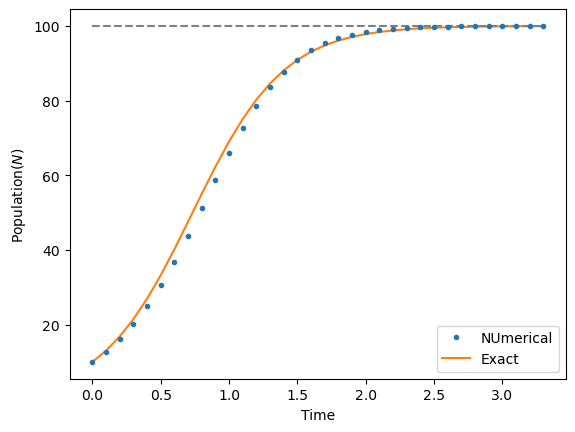

In [3]:
def logistic(time, N0, carrying_capacity, rate):
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output

N_stop_difference = 1E-2  #stop running if the change in popln is less than this value

dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)
    
    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt
    
    try:  # stopping the graph if change in population is too small
        if np.abs(data['N'][-1] - data['N'][-2]) <= N_stop_difference:
            break
    
    except IndexError:
        if len(data['N']) < 2: # the list is empty at first so need to ignore the index error
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time = np.array(data['time']),
                     N0 = N0,
                     carrying_capacity = K,
                     rate = rate)

plt.plot(data['time'], data['N'], '.', label = 'NUmerical')
plt.plot(data['time'], exact_data, label = 'Exact', zorder = 1)
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
          colors='grey', ls='dashed', zorder = 1)

### 1.8 Some things to note about the code

In [ ]:

# Your code here


## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:

# Your code here


### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

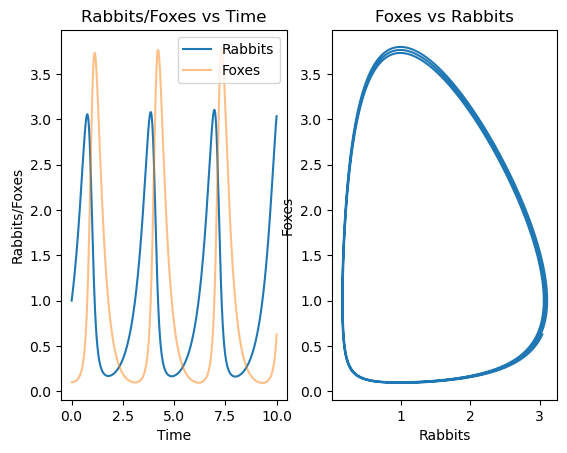

In [3]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

### 2.3 Some things to note about the code

In [ ]:

# Your code here


## 3 Hello SciPy

### 3.1 SciPy odeint()

In [3]:
from scipy.integrate import odeint

$dy/dx = f(y, x)$ dependent variable first, independent variable after

### 3.2 Radioactivity

Text(0.5, 0, 'Time(Millions of years)')

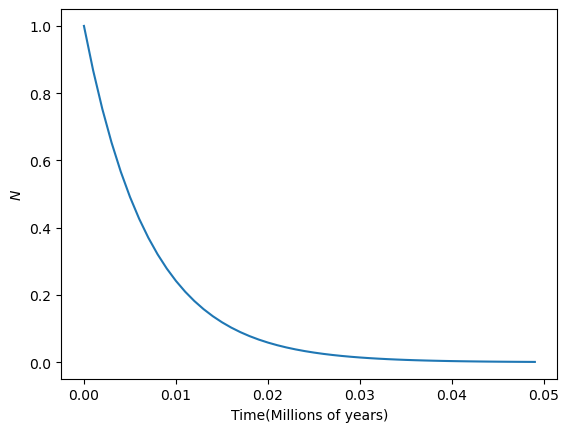

In [9]:
max_time = 0.05
dt = .001
decay_constant = 142       
N0 = 1                    

def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return -decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=N0,                    # Initial values
               func=dNdt,                # Function for the derivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )

plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')

### 3.3 Logistic Equation

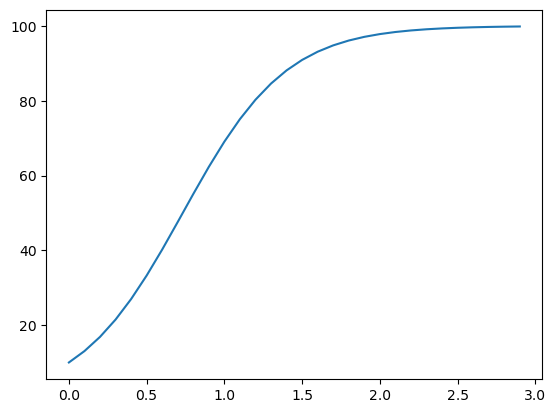

In [15]:
def dNdt(N, time, rate, carrying_capacity):
    
    return rate*N*(1-N/carrying_capacity)

max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

plt.plot(data['time'], data['N'])

In [21]:
def dNdt(N, time, rate, carrying_capacity):
    
    return rate*N*(1-N/carrying_capacity)

max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))
print(data['N'])

[[10.        ]
 [13.04229203]
 [16.8369876 ]
 [21.46324866]
 [26.94874599]
 [33.24278793]
 [40.19793752]
 [47.57130133]
 [55.05208914]
 [62.31113668]
 [69.05678814]
 [75.07797988]
 [80.26239579]
 [84.58968891]
 [88.10881789]
 [90.91066382]
 [93.10399853]
 [94.79834629]
 [96.0938586 ]
 [97.07666369]
 [97.81780565]
 [98.3741956 ]
 [98.79047791]
 [99.10114632]
 [99.33255791]
 [99.50468992]
 [99.63259361]
 [99.72755928]
 [99.79802842]
 [99.85029751]]


### 3.4 Predator-Prey

Text(0.5, 1.0, 'Foxes vs Rabbits')

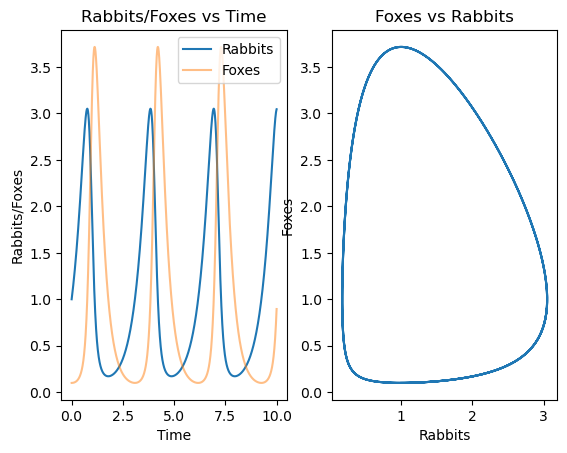

In [18]:
max_time = 10
dt = .001
rabbits0, foxes0 = 1, .1

def dydt(y, t):
    rabbits, foxes = y
    
    a, b = 2, 2
    drabbitsdt = a*rabbits - b*rabbits*foxes
    
    d, g = 3, 3
    dfoxesdt = d*foxes*rabbits - g*foxes
    
    return [drabbitsdt, dfoxesdt]

data = {}
data['time'] = np.arange(0, max_time, dt)

results = odeint(dydt, [rabbits0, foxes0], data['time'])

data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

fig, ax = plt.subplots(nrows = 1, ncols = 2)
time, other = ax

time.plot(data['time'], data['rabbits'], label = 'Rabbits')
time.plot(data['time'], data['foxes'], label = 'Foxes', alpha = .5)
time.set_ylabel('Rabbits/Foxes')
time.set_xlabel('Time')
time.set_title(f'Rabbits/Foxes vs Time')
time.legend()

other.plot(data['rabbits'], data['foxes'])
other.set_xlabel('Rabbits')
other.set_ylabel('Foxes')
other.set_title(f'Foxes vs Rabbits')

## Exercise 1 :  The Lorentz Attaractor

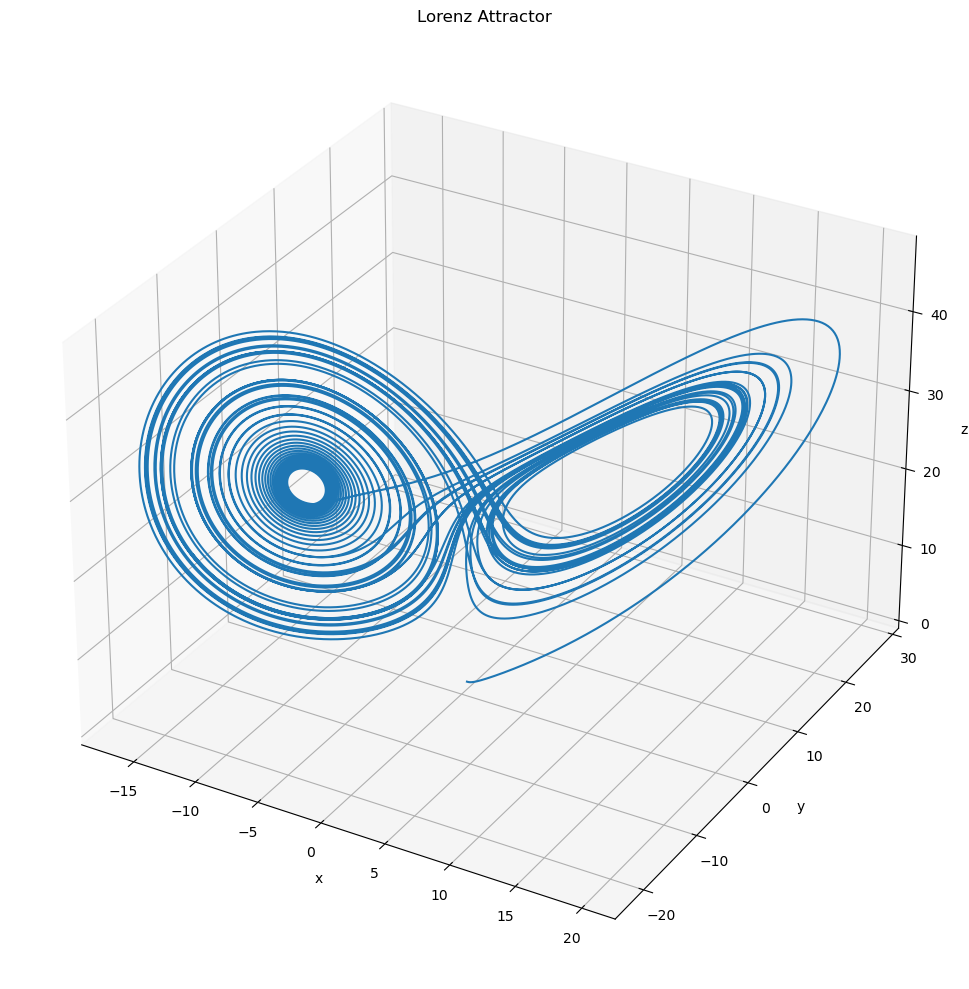

In [21]:
def lorenz(var, t, sigma, rho, beta):
    x, y, z = var
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

sigma = 10
beta = 8/3
rho = 28

x0, y0, z0 = 0, 1, 0
dt = 0.001

data = {}
data['time'] = np.arange(0, 50, dt)

results = odeint(lorenz, [x0, y0, z0], data['time'], args=(sigma, rho, beta))

data['x'] = results[:, 0]
data['y'] = results[:, 1]
data['z'] = results[:, 2]

plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
ax.plot3D(data['x'], data['y'], data['z'])
ax.set_title('Lorenz Attractor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()